In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 


ModuleNotFoundError: No module named 'matplotlib'

In [4]:
# read csv file of crime data from 01/01/2017 to 11/30/2022
my_df17 = pd.read_csv('SPD_Crime_Data__2017-2022.csv')
# check the size of dataframe
my_df17.shape

NameError: name 'pd' is not defined

In [3]:
# split column into multiple columns by delimiter, so we can append month, date and year cloumns into original dataframe.
date = my_df17["Offense Start DateTime"].str.split(" ", expand=True)
month_date_year = date[0].str.split("/",expand = True)
month_date_year.head()


,0,1,2
0,01,01,2017
1,01,01,2017
2,01,01,2017
3,01,01,2017
4,01,01,2017


In [4]:
# put the splited column from 'month_date_year' into 'my_df17' dataframe
my_df17["Month"] = month_date_year[0]
my_df17["Date"] = month_date_year[1]
my_df17["Year"] = month_date_year[2]
my_df17.tail()

,Report Number,Offense ID,Offense Start DateTime,Offense End DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense,Offense Code,Precinct,Sector,Beat,MCPP,100 Block Address,Longitude,Latitude,Month,Date,Year
433719,2022-321197,38731401343,11/30/2022 11:00:00 PM,11/30/2022 11:30:00 PM,12/01/2022 12:18:52 AM,A,PERSON,ASSAULT OFFENSES,Simple Assault,13B,N,N,N2,BITTERLAKE,141XX BLOCK OF AURORA AVE N,-122.345070,47.731674,11,30,2022
433720,2022-321635,38735562241,11/30/2022 11:00:00 PM,12/01/2022 01:00:00 PM,12/01/2022 02:08:28 PM,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,E,C,C2,MILLER PARK,20XX BLOCK OF E JANSEN CT,-122.305714,47.619666,11,30,2022
433721,2022-321363,38733593549,12/01/2022 12:00:00 AM,12/01/2022 09:00:00 AM,12/01/2022 09:52:05 AM,A,PERSON,ASSAULT OFFENSES,Intimidation,13C,N,U,U2,UNIVERSITY,47XX BLOCK OF 15TH AVE NE,-122.311952,47.663988,12,01,2022
433722,2022-321207,38731781143,12/01/2022 12:00:00 AM,12/01/2022 12:02:00 AM,12/01/2022 02:58:44 AM,B,SOCIETY,DRIVING UNDER THE INFLUENCE,Driving Under the Influence,90D,N,J,J3,ROOSEVELT/RAVENNA,NE RAVENNA BLVD / WOODLAWN AVE NE,-122.324989,47.678758,12,01,2022
433723,2022-321214,38731355982,12/01/2022 12:00:00 AM,12/01/2022 12:30:00 AM,12/01/2022 12:31:31 AM,A,PROPERTY,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories,23G,N,N,N2,BITTERLAKE,132XX BLOCK OF AURORA AVE N,-122.344997,47.725036,12,01,2022


In [5]:
#The analysis will focus on the comparasion of data of prior to COVID pandemic from 2017 to 2019 and during the COVID pandemic from Jan 2020 to Nov 2022.
df_mcpp = my_df17[["MCPP","Year", "Month", "Date"]]
df_mcpp.head()

,MCPP,Year,Month,Date
0,FREMONT,2017,01,01
1,MONTLAKE/PORTAGE BAY,2017,01,01
2,ROOSEVELT/RAVENNA,2017,01,01
3,WALLINGFORD,2017,01,01
4,MID BEACON HILL,2017,01,01


In [6]:
#calculate the crime report total of each year for analysis
df_mcpp["Year"].value_counts()

2020    76195
2018    75296
2017    73064
2021    71041
2019    70396
2022    67732
Name: Year, dtype: int64

In [7]:
%matplotlib inline

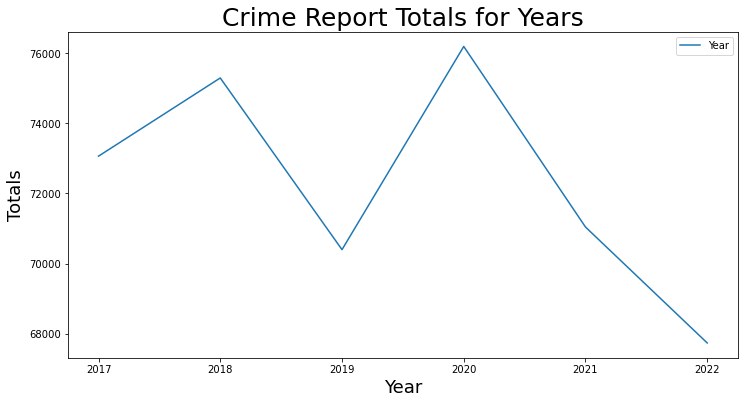

In [8]:
# Convert pandas Series to DataFrame to draw a line plot
pd.DataFrame(df_mcpp["Year"].value_counts().sort_index()).plot(kind = "line", figsize = (12,6))
plt.title("Crime Report Totals for Years",fontdict = {'fontsize' : 25})
plt.xlabel("Year",fontdict = {'fontsize' : 18})
plt.ylabel("Totals",fontdict = {'fontsize' : 18})
plt.show()

In [9]:
df_mcpp["MCPP"].value_counts()

DOWNTOWN COMMERCIAL         32686
CAPITOL HILL                26799
NORTHGATE                   25035
QUEEN ANNE                  23177
SLU/CASCADE                 19029
                            ...  
PIGEON POINT                  536
COMMERCIAL DUWAMISH           360
COMMERCIAL HARBOR ISLAND      211
CAPTIOL HILL                    1
<Null>                          1
Name: MCPP, Length: 61, dtype: int64

In [10]:
df_mcpp["MCPP"].unique()

array(['FREMONT', 'MONTLAKE/PORTAGE BAY', 'ROOSEVELT/RAVENNA',
       'WALLINGFORD', 'MID BEACON HILL', 'RAINIER VIEW', 'MOUNT BAKER',
       'QUEEN ANNE', 'SOUTH BEACON HILL', 'DOWNTOWN COMMERCIAL',
       'NORTH DELRIDGE', 'NORTH ADMIRAL', 'SLU/CASCADE', 'SANDPOINT',
       'EASTLAKE - WEST', 'UNIVERSITY', 'FIRST HILL', 'BITTERLAKE',
       'BELLTOWN', 'BRIGHTON/DUNLAP', 'BALLARD SOUTH', 'BALLARD NORTH',
       'CAPITOL HILL', 'SOUTH PARK', 'CENTRAL AREA/SQUIRE PARK',
       'ROXHILL/WESTWOOD/ARBOR HEIGHTS', 'GREENWOOD', 'UNKNOWN',
       'COLUMBIA CITY', 'MAGNOLIA', 'NORTHGATE', 'SODO', 'LAKECITY',
       'PIONEER SQUARE', 'CHINATOWN/INTERNATIONAL DISTRICT', 'MORGAN',
       'ALASKA JUNCTION', 'MADRONA/LESCHI',
       'JUDKINS PARK/NORTH BEACON HILL', 'LAKEWOOD/SEWARD PARK',
       'FAUNTLEROY SW', 'GEORGETOWN', 'PHINNEY RIDGE',
       'CLAREMONT/RAINIER VISTA', 'NORTH BEACON HILL', 'HIGHLAND PARK',
       'MILLER PARK', 'RAINIER BEACH', 'EASTLAKE - EAST', 'HILLMAN CITY',
       'HI

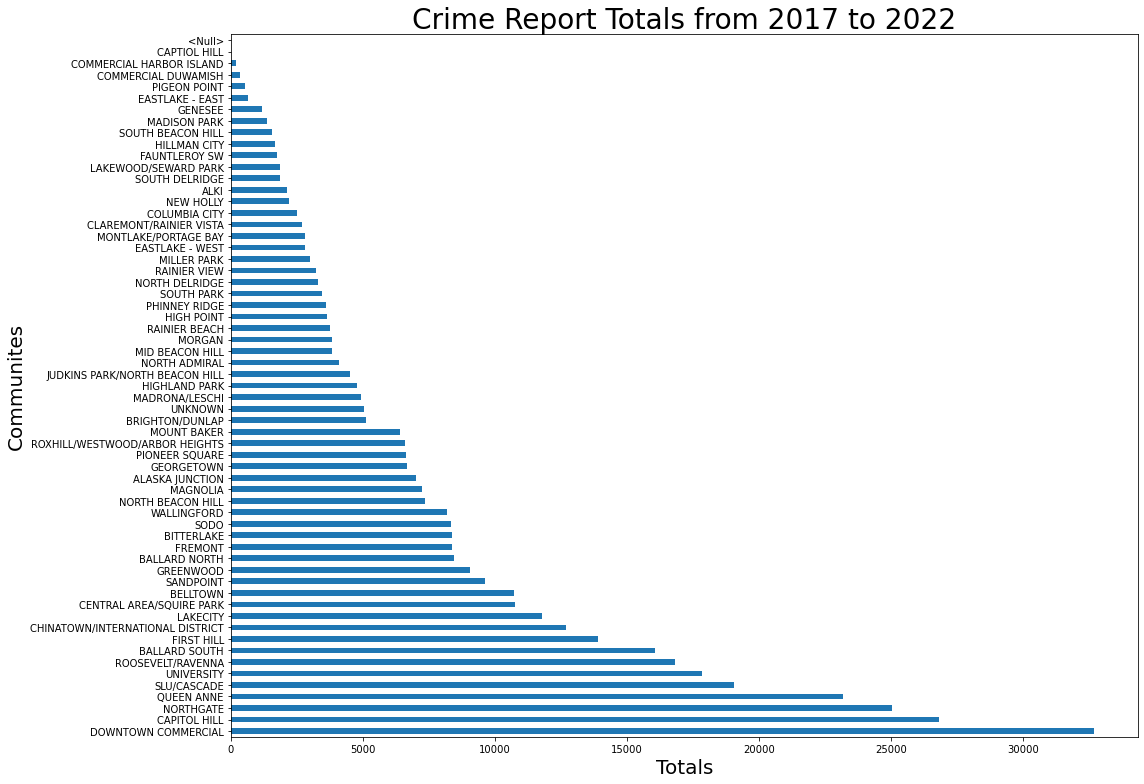

In [11]:
df_mcpp["MCPP"].value_counts().plot(kind="barh", figsize=(16,11))
plt.title("Crime Report Totals from 2017 to 2022",fontdict = {'fontsize' : 28})
plt.xlabel("Totals",fontdict = {'fontsize' : 20})
plt.ylabel("Communites",fontdict = {'fontsize' : 20})
plt.tight_layout()
plt.show()

In [12]:
#pick top 5 of communities to compare the totals
# top1: DOWNTOWN COMMERCIAL
# calculate the totals of three years before the pandemic(2017-2019)
df_downtown_before = df_mcpp[(df_mcpp["MCPP"] == "DOWNTOWN COMMERCIAL") & ((df_mcpp["Year"] == "2017") | (df_mcpp["Year"] == "2018") | (df_mcpp["Year"] == "2019")) ]
df_downtown_before.shape


(20168, 4)

In [13]:
# top1: DOWNTOWN COMMERCIAL
# calculate the totals of three years during the pandemic(2020-2022)
df_downtown_during = df_mcpp[(df_mcpp["MCPP"] == "DOWNTOWN COMMERCIAL") & ((df_mcpp["Year"] == "2020") | (df_mcpp["Year"] == "2021") | (df_mcpp["Year"] == "2022")) ]
df_downtown_during.shape


(12518, 4)

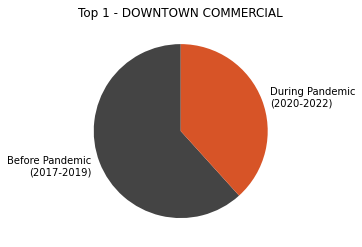

In [14]:
#draw a pie to compare two groups of data for DOWNTOWN COMMERCIAL
labels_downtown = ["Before Pandemic\n(2017-2019)","During Pandemic\n(2020-2022)"]
share_downtown = [20168, 12518]
figureObject, axesObject = plt.subplots()
axesObject.set_title("Top 1 - DOWNTOWN COMMERCIAL")
colors = ["#444444","#d75427"]
axesObject.pie(share_downtown, labels=labels_downtown, startangle=90,colors = colors)
plt.show()

In [15]:
#pick top 5 of communities to compare the totals
# top2: CAPITOL HILL 
# calculate the totals of three years before the pandemic(2017-2019)
df_capitol_before = df_mcpp[(df_mcpp["MCPP"] == "CAPITOL HILL") & ((df_mcpp["Year"] == "2017") | (df_mcpp["Year"] == "2018") | (df_mcpp["Year"] == "2019")) ]
df_capitol_before.shape


(13773, 4)

In [16]:
# top2: CAPITOL HILL 
# calculate the totals of three years during the pandemic(2020-2022)
df_CAPITOL_during = df_mcpp[(df_mcpp["MCPP"] == "CAPITOL HILL") & ((df_mcpp["Year"] == "2020") | (df_mcpp["Year"] == "2021") | (df_mcpp["Year"] == "2022")) ]
df_CAPITOL_during.shape


(13026, 4)

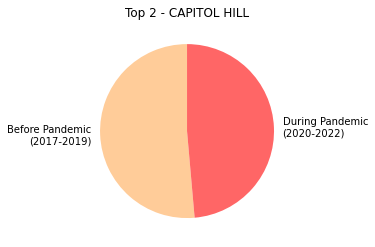

In [17]:
#draw a pie to compare two groups of data for CAPITOL HILL 
labels_CAPITOL = ["Before Pandemic\n(2017-2019)","During Pandemic\n(2020-2022)"]
share_CAPITOL = [13773, 13026]
figureObject, axesObject = plt.subplots()
axesObject.set_title("Top 2 - CAPITOL HILL")
colors = ['#ffcc99','#ff6666']
axesObject.pie(share_CAPITOL, labels=labels_CAPITOL, startangle=90, colors=colors)
plt.show()

In [18]:
#pick top 5 of communities to compare the totals
# top3: NORTHGATE 
# calculate the totals of three years before the pandemic(2017-2019)
df_NORTHGATE_before = df_mcpp[(df_mcpp["MCPP"] == "NORTHGATE") & ((df_mcpp["Year"] == "2017") | (df_mcpp["Year"] == "2018") | (df_mcpp["Year"] == "2019")) ]
df_NORTHGATE_before.shape


(13184, 4)

In [19]:
# top3: NORTHGATE 
# calculate the totals of three years during the pandemic(2020-2022)
df_NORTHGATE_during = df_mcpp[(df_mcpp["MCPP"] == "NORTHGATE") & ((df_mcpp["Year"] == "2020") | (df_mcpp["Year"] == "2021") | (df_mcpp["Year"] == "2022")) ]
df_NORTHGATE_during.shape


(11851, 4)

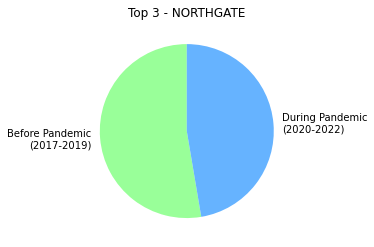

In [20]:
#draw a pie to compare two groups of data for NORTHGATE 
labels_NORTHGATE = ["Before Pandemic\n(2017-2019)","During Pandemic\n(2020-2022)"]
share_NORTHGATE = [13184, 11851]
figureObject, axesObject = plt.subplots()
axesObject.set_title("Top 3 - NORTHGATE")
colors = ['#99ff99', '#66b3ff']
axesObject.pie(share_NORTHGATE, labels=labels_NORTHGATE, startangle=90, colors=colors)
plt.show()

In [21]:
#pick top 5 of communities to compare the totals
# top4: QUEEN ANNE
# calculate the totals of three years before the pandemic(2017-2019)
df_QUEENANNE_before = df_mcpp[(df_mcpp["MCPP"] == "QUEEN ANNE") & ((df_mcpp["Year"] == "2017") | (df_mcpp["Year"] == "2018") | (df_mcpp["Year"] == "2019")) ]
df_QUEENANNE_before.shape

(11030, 4)

In [22]:
# top4: QUEEN ANNE
# calculate the totals of three years during the pandemic(2020-2022)
df_QUEENANNE_during = df_mcpp[(df_mcpp["MCPP"] == "QUEEN ANNE") & ((df_mcpp["Year"] == "2020") | (df_mcpp["Year"] == "2021") | (df_mcpp["Year"] == "2022")) ]
df_QUEENANNE_during.shape

(12147, 4)

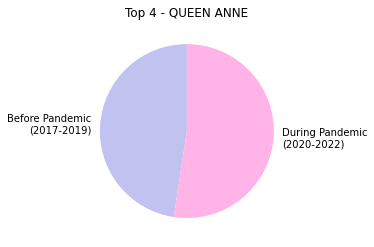

In [23]:
#draw a pie to compare two groups of data for QUEEN ANNE
labels_QUEENANNE = ["Before Pandemic\n(2017-2019)","During Pandemic\n(2020-2022)"]
share_QUEENANNE = [11030, 12147]
figureObject, axesObject = plt.subplots()
axesObject.set_title("Top 4 - QUEEN ANNE")
colors = ['#c2c2f0','#ffb3e6']
axesObject.pie(share_QUEENANNE, labels=labels_QUEENANNE, startangle=90, colors=colors)
plt.show()

In [24]:
#pick top 5 of communities to compare the totals
# top5: SLU/CASCADE
# calculate the totals of three years before the pandemic(2017-2019)
df_SLU_before = df_mcpp[(df_mcpp["MCPP"] == "SLU/CASCADE") & ((df_mcpp["Year"] == "2017") | (df_mcpp["Year"] == "2018") | (df_mcpp["Year"] == "2019")) ]
df_SLU_before.shape

(9368, 4)

In [25]:
# top5: SLU/CASCADE
# calculate the totals of three years during the pandemic(2020-2022)
df_SLU_during = df_mcpp[(df_mcpp["MCPP"] == "SLU/CASCADE") & ((df_mcpp["Year"] == "2020") | (df_mcpp["Year"] == "2021") | (df_mcpp["Year"] == "2022")) ]
df_SLU_during.shape

(9661, 4)

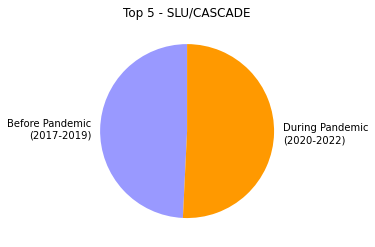

In [26]:
#draw a pie to compare two groups of data for SLU/CASCADE
labels_SLU = ["Before Pandemic\n(2017-2019)","During Pandemic\n(2020-2022)"]
share_SLU = [9368, 9661]
figureObject, axesObject = plt.subplots()
axesObject.set_title("Top 5 - SLU/CASCADE")
colors = ["#9999FF","#FF9900"]
axesObject.pie(share_SLU, labels=labels_SLU, startangle=90, colors=colors)
plt.show()

In [27]:
# analyze reports averages of each month before the pandemic and during the pandemic
# Top1: DOWNTOWN COMMERCIAL
df_01before_dt = df_mcpp[(df_mcpp["MCPP"] == "DOWNTOWN COMMERCIAL") & ((df_mcpp["Year"] == "2017")| (df_mcpp["Year"] == "2018") | (df_mcpp["Year"] == "2019") )& (df_mcpp["Month"] == "01")]
len(df_01before_dt)


1784

In [28]:
df_01during_dt = df_mcpp[(df_mcpp["MCPP"] == "DOWNTOWN COMMERCIAL") & ((df_mcpp["Year"] == "2020")| (df_mcpp["Year"] == "2021") | (df_mcpp["Year"] == "2022") )& (df_mcpp["Month"] == "01")]
len(df_01during_dt)


1257

In [29]:
# double check the sum of two numbers above
len(df_mcpp[(df_mcpp["MCPP"] == "DOWNTOWN COMMERCIAL") & (df_mcpp["Month"] == "01")])

3041

In [30]:
# define a function to calculate the average of each month in the period
# community is String of name, period is only picked from "before" or "during", month is String like 01,02...,11,12.
def calc_avg(community, period, month):
    if period == "before":
        df_before_dt = df_mcpp[(df_mcpp["MCPP"] == community) & ((df_mcpp["Year"] == "2017")| (df_mcpp["Year"] == "2018") | (df_mcpp["Year"] == "2019") )& (df_mcpp["Month"] == month)]
        return int(len(df_before_dt)/3)
    elif period == "during":
        df_during_dt = df_mcpp[(df_mcpp["MCPP"] == community) & ((df_mcpp["Year"] == "2020")| (df_mcpp["Year"] == "2021") | (df_mcpp["Year"] == "2022") )& (df_mcpp["Month"] == month)]
        return int(len(df_during_dt)/3)
    else:
        return 0    

In [31]:
# test calc_avg(community, period, month) function 
# should be equal to 1257/3 = 419
print(calc_avg("DOWNTOWN COMMERCIAL", "during", "01"))

419


In [32]:
#avg for 12 months from 2017 to 2019
avg_dt_before = [calc_avg("DOWNTOWN COMMERCIAL", "before", "01"),
                 calc_avg("DOWNTOWN COMMERCIAL", "before", "02"),
                 calc_avg("DOWNTOWN COMMERCIAL", "before", "03"),
                 calc_avg("DOWNTOWN COMMERCIAL", "before", "04"),
                 calc_avg("DOWNTOWN COMMERCIAL", "before", "05"),
                 calc_avg("DOWNTOWN COMMERCIAL", "before", "06"),
                 calc_avg("DOWNTOWN COMMERCIAL", "before", "07"),
                 calc_avg("DOWNTOWN COMMERCIAL", "before", "08"),
                 calc_avg("DOWNTOWN COMMERCIAL", "before", "09"),
                 calc_avg("DOWNTOWN COMMERCIAL", "before", "10"),
                 calc_avg("DOWNTOWN COMMERCIAL", "before", "11"),
                 calc_avg("DOWNTOWN COMMERCIAL", "before", "12")]

avg_dt_during = [calc_avg("DOWNTOWN COMMERCIAL", "during", "01"),
                 calc_avg("DOWNTOWN COMMERCIAL", "during", "02"),
                 calc_avg("DOWNTOWN COMMERCIAL", "during", "03"),
                 calc_avg("DOWNTOWN COMMERCIAL", "during", "04"),
                 calc_avg("DOWNTOWN COMMERCIAL", "during", "05"),
                 calc_avg("DOWNTOWN COMMERCIAL", "during", "06"),
                 calc_avg("DOWNTOWN COMMERCIAL", "during", "07"),
                 calc_avg("DOWNTOWN COMMERCIAL", "during", "08"),
                 calc_avg("DOWNTOWN COMMERCIAL", "during", "09"),
                 calc_avg("DOWNTOWN COMMERCIAL", "during", "10"),
                 calc_avg("DOWNTOWN COMMERCIAL", "during", "11"),
                 calc_avg("DOWNTOWN COMMERCIAL", "during", "12")]
print(avg_dt_before)
print(avg_dt_during)


[594, 497, 592, 564, 554, 551, 620, 530, 552, 539, 573, 552]
[419, 394, 390, 325, 449, 316, 354, 354, 338, 311, 292, 228]


In [33]:
month = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sept", "Oct", "Nov", "Dec"]


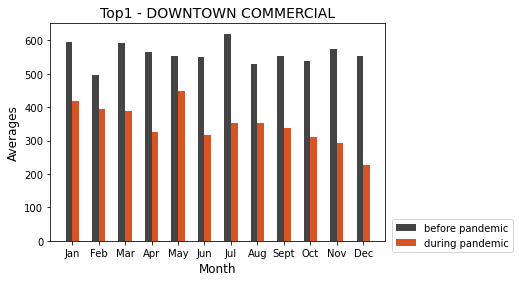

In [34]:
x_labels = np.arange(len(month))
width = 0.25
plt.bar(x_labels - width, avg_dt_before, width = width, color = "#444444", label = "before pandemic",align='edge')
plt.bar(x_labels , avg_dt_during, width = width, color = "#d75427", label = "during pandemic",align='edge')
plt.xticks(ticks = x_labels, labels = month)
plt.legend(bbox_to_anchor=(1.02, 0.1), loc='upper left', borderaxespad=0) #add notation
plt.title("Top1 - DOWNTOWN COMMERCIAL",fontdict = {'fontsize' : 14})
plt.xlabel("Month",fontdict = {'fontsize' : 12})
plt.ylabel("Averages",fontdict = {'fontsize' : 12})
plt.show()

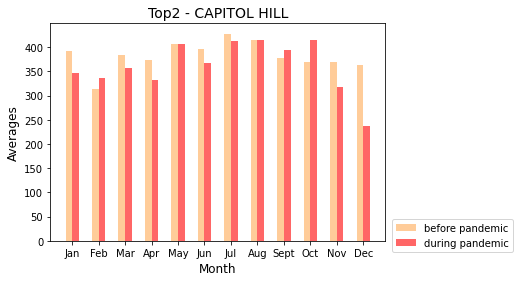

In [35]:
# analyze reports averages of each month before the pandemic and during the pandemic
# Top2: CAPITOL HILL
#avg for 12 months from 2017 to 2019
avg_ch_before = [calc_avg("CAPITOL HILL", "before", "01"),
                 calc_avg("CAPITOL HILL", "before", "02"),
                 calc_avg("CAPITOL HILL", "before", "03"),
                 calc_avg("CAPITOL HILL", "before", "04"),
                 calc_avg("CAPITOL HILL", "before", "05"),
                 calc_avg("CAPITOL HILL", "before", "06"),
                 calc_avg("CAPITOL HILL", "before", "07"),
                 calc_avg("CAPITOL HILL", "before", "08"),
                 calc_avg("CAPITOL HILL", "before", "09"),
                 calc_avg("CAPITOL HILL", "before", "10"),
                 calc_avg("CAPITOL HILL", "before", "11"),
                 calc_avg("CAPITOL HILL", "before", "12")]

avg_ch_during = [calc_avg("CAPITOL HILL", "during", "01"),
                 calc_avg("CAPITOL HILL", "during", "02"),
                 calc_avg("CAPITOL HILL", "during", "03"),
                 calc_avg("CAPITOL HILL", "during", "04"),
                 calc_avg("CAPITOL HILL", "during", "05"),
                 calc_avg("CAPITOL HILL", "during", "06"),
                 calc_avg("CAPITOL HILL", "during", "07"),
                 calc_avg("CAPITOL HILL", "during", "08"),
                 calc_avg("CAPITOL HILL", "during", "09"),
                 calc_avg("CAPITOL HILL", "during", "10"),
                 calc_avg("CAPITOL HILL", "during", "11"),
                 calc_avg("CAPITOL HILL", "during", "12")]

x_labels = np.arange(len(month))
width = 0.25
plt.bar(x_labels - width, avg_ch_before, width = width, color = '#ffcc99', label = "before pandemic",align='edge')
plt.bar(x_labels , avg_ch_during, width = width, color = '#ff6666', label = "during pandemic",align='edge')
plt.xticks(ticks = x_labels, labels = month)
plt.legend(bbox_to_anchor=(1.02, 0.1), loc='upper left', borderaxespad=0) #add notation
plt.title("Top2 - CAPITOL HILL",fontdict = {'fontsize' : 14})
plt.xlabel("Month",fontdict = {'fontsize' : 12})
plt.ylabel("Averages",fontdict = {'fontsize' : 12})
plt.show()

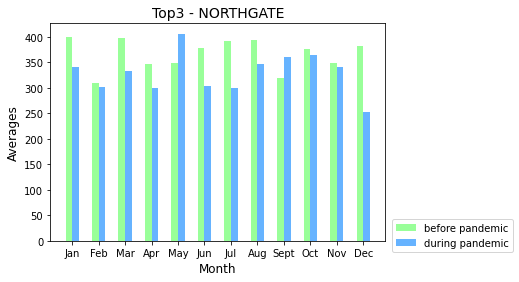

In [36]:
# analyze reports averages of each month before the pandemic and during the pandemic
# Top3: NORTHGATE
#avg for 12 months from 2017 to 2019
avg_ng_before = [calc_avg("NORTHGATE", "before", "01"),
                 calc_avg("NORTHGATE", "before", "02"),
                 calc_avg("NORTHGATE", "before", "03"),
                 calc_avg("NORTHGATE", "before", "04"),
                 calc_avg("NORTHGATE", "before", "05"),
                 calc_avg("NORTHGATE", "before", "06"),
                 calc_avg("NORTHGATE", "before", "07"),
                 calc_avg("NORTHGATE", "before", "08"),
                 calc_avg("NORTHGATE", "before", "09"),
                 calc_avg("NORTHGATE", "before", "10"),
                 calc_avg("NORTHGATE", "before", "11"),
                 calc_avg("NORTHGATE", "before", "12")]

avg_ng_during = [calc_avg("NORTHGATE", "during", "01"),
                 calc_avg("NORTHGATE", "during", "02"),
                 calc_avg("NORTHGATE", "during", "03"),
                 calc_avg("NORTHGATE", "during", "04"),
                 calc_avg("NORTHGATE", "during", "05"),
                 calc_avg("NORTHGATE", "during", "06"),
                 calc_avg("NORTHGATE", "during", "07"),
                 calc_avg("NORTHGATE", "during", "08"),
                 calc_avg("NORTHGATE", "during", "09"),
                 calc_avg("NORTHGATE", "during", "10"),
                 calc_avg("NORTHGATE", "during", "11"),
                 calc_avg("NORTHGATE", "during", "12")]

x_labels = np.arange(len(month))
width = 0.25
plt.bar(x_labels - width, avg_ng_before, width = width, color = '#99ff99', label = "before pandemic",align='edge')
plt.bar(x_labels , avg_ng_during, width = width, color = '#66b3ff', label = "during pandemic",align='edge')
plt.xticks(ticks = x_labels, labels = month)
plt.legend(bbox_to_anchor=(1.02, 0.1), loc='upper left', borderaxespad=0) #add notation
plt.title("Top3 - NORTHGATE",fontdict = {'fontsize' : 14})
plt.xlabel("Month",fontdict = {'fontsize' : 12})
plt.ylabel("Averages",fontdict = {'fontsize' : 12})
plt.show()

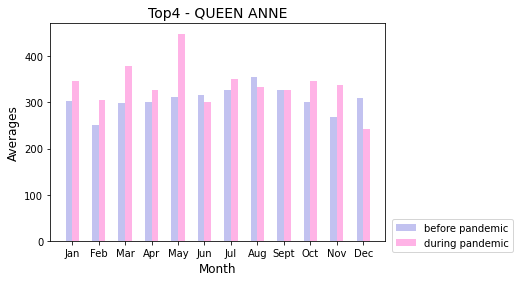

In [37]:
# analyze reports averages of each month before the pandemic and during the pandemic
# Top4: QUEEN ANNE
#avg for 12 months from 2017 to 2019
avg_qa_before = [calc_avg("QUEEN ANNE", "before", "01"),
                 calc_avg("QUEEN ANNE", "before", "02"),
                 calc_avg("QUEEN ANNE", "before", "03"),
                 calc_avg("QUEEN ANNE", "before", "04"),
                 calc_avg("QUEEN ANNE", "before", "05"),
                 calc_avg("QUEEN ANNE", "before", "06"),
                 calc_avg("QUEEN ANNE", "before", "07"),
                 calc_avg("QUEEN ANNE", "before", "08"),
                 calc_avg("QUEEN ANNE", "before", "09"),
                 calc_avg("QUEEN ANNE", "before", "10"),
                 calc_avg("QUEEN ANNE", "before", "11"),
                 calc_avg("QUEEN ANNE", "before", "12")]

avg_qa_during = [calc_avg("QUEEN ANNE", "during", "01"),
                 calc_avg("QUEEN ANNE", "during", "02"),
                 calc_avg("QUEEN ANNE", "during", "03"),
                 calc_avg("QUEEN ANNE", "during", "04"),
                 calc_avg("QUEEN ANNE", "during", "05"),
                 calc_avg("QUEEN ANNE", "during", "06"),
                 calc_avg("QUEEN ANNE", "during", "07"),
                 calc_avg("QUEEN ANNE", "during", "08"),
                 calc_avg("QUEEN ANNE", "during", "09"),
                 calc_avg("QUEEN ANNE", "during", "10"),
                 calc_avg("QUEEN ANNE", "during", "11"),
                 calc_avg("QUEEN ANNE", "during", "12")]

x_labels = np.arange(len(month))
width = 0.25
plt.bar(x_labels - width, avg_qa_before, width = width, color = '#c2c2f0', label = "before pandemic",align='edge')
plt.bar(x_labels , avg_qa_during, width = width, color = '#ffb3e6', label = "during pandemic",align='edge')
plt.xticks(ticks = x_labels, labels = month)
plt.legend(bbox_to_anchor=(1.02, 0.1), loc='upper left', borderaxespad=0) #add notation
plt.title("Top4 - QUEEN ANNE",fontdict = {'fontsize' : 14})
plt.xlabel("Month",fontdict = {'fontsize' : 12})
plt.ylabel("Averages",fontdict = {'fontsize' : 12})
plt.show()

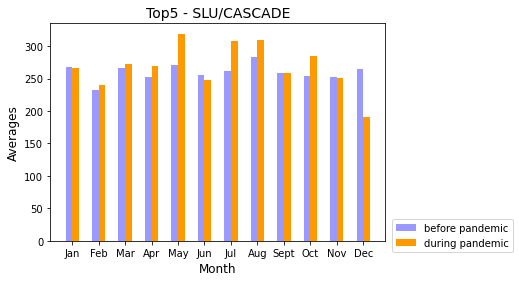

In [38]:
# analyze reports averages of each month before the pandemic and during the pandemic
# Top5: SLU/CASCADE
#avg for 12 months from 2017 to 2019
avg_sc_before = [calc_avg("SLU/CASCADE", "before", "01"),
                 calc_avg("SLU/CASCADE", "before", "02"),
                 calc_avg("SLU/CASCADE", "before", "03"),
                 calc_avg("SLU/CASCADE", "before", "04"),
                 calc_avg("SLU/CASCADE", "before", "05"),
                 calc_avg("SLU/CASCADE", "before", "06"),
                 calc_avg("SLU/CASCADE", "before", "07"),
                 calc_avg("SLU/CASCADE", "before", "08"),
                 calc_avg("SLU/CASCADE", "before", "09"),
                 calc_avg("SLU/CASCADE", "before", "10"),
                 calc_avg("SLU/CASCADE", "before", "11"),
                 calc_avg("SLU/CASCADE", "before", "12")]

avg_sc_during = [calc_avg("SLU/CASCADE", "during", "01"),
                 calc_avg("SLU/CASCADE", "during", "02"),
                 calc_avg("SLU/CASCADE", "during", "03"),
                 calc_avg("SLU/CASCADE", "during", "04"),
                 calc_avg("SLU/CASCADE", "during", "05"),
                 calc_avg("SLU/CASCADE", "during", "06"),
                 calc_avg("SLU/CASCADE", "during", "07"),
                 calc_avg("SLU/CASCADE", "during", "08"),
                 calc_avg("SLU/CASCADE", "during", "09"),
                 calc_avg("SLU/CASCADE", "during", "10"),
                 calc_avg("SLU/CASCADE", "during", "11"),
                 calc_avg("SLU/CASCADE", "during", "12")]

x_labels = np.arange(len(month))
width = 0.25
plt.bar(x_labels - width, avg_sc_before, width = width, color = "#9999FF", label = "before pandemic",align='edge')
plt.bar(x_labels , avg_sc_during, width = width, color = "#FF9900", label = "during pandemic",align='edge')
plt.xticks(ticks = x_labels, labels = month)
plt.legend(bbox_to_anchor=(1.02, 0.1), loc='upper left', borderaxespad=0) #add notation
plt.title("Top5 - SLU/CASCADE",fontdict = {'fontsize' : 14})
plt.xlabel("Month",fontdict = {'fontsize' : 12})
plt.ylabel("Averages",fontdict = {'fontsize' : 12})
plt.show()